In [48]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report
from sklearn.decomposition import PCA
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
import os
import shutil
import random

def split_train_test(train_dir, test_dir, test_ratio=0.2):
    """Splits the train set into train and test folders.

    Args:
        train_dir: Path to the train directory.
        test_dir: Path to the test directory.
        test_ratio: Proportion of data to be used for testing.
    """
    os.makedirs(test_dir, exist_ok=True)  # Create test_dir if it doesn't exist

    for class_name in os.listdir(train_dir):
        class_train_dir = os.path.join(train_dir, class_name)
        class_test_dir = os.path.join(test_dir, class_name)
        os.makedirs(class_test_dir, exist_ok=True)

        images = os.listdir(class_train_dir)
        num_test_images = int(len(images) * test_ratio)
        test_images = random.sample(images, num_test_images)

        for image_name in test_images:
            src_path = os.path.join(class_train_dir, image_name)
            dst_path = os.path.join(class_test_dir, image_name)
            shutil.move(src_path, dst_path)

# Example usage:
train_dir = '/content/drive/MyDrive/IMG/Train'
test_dir = '/content/drive/MyDrive/IMG/Test'
split_train_test(train_dir, test_dir, test_ratio=0.2)

In [50]:
def load_images_from_directory(directory,size=(64,64)):
    images = []
    labels = []
    classses = os.listdir(directory)
    for cls in classses:
        class_dir= os.path.join(directory,cls)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir,img_name)
                img= Image.open(img_path).resize(size)
                images.append(np.array(img))
                labels.append(cls)
    return np.array(images),np.array(labels)



In [51]:
    train_images,train_labels =load_images_from_directory('/content/drive/MyDrive/IMG/Train')
    test_images,test_labels = load_images_from_directory('/content/drive/MyDrive/IMG/Test')
    X_train=train_images.reshape(train_images.shape[0],-1)
    X_test=test_images.reshape(test_images.shape[0],-1)

    label_map={label:idx for idx,label in enumerate(np.unique(train_labels))}
    y_train=np.array([label_map[label] for label in train_labels])
    y_test=np.array([label_map[label] for label in test_labels])

    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)

    pca=PCA(n_components=50)
    X_train_pca=pca.fit_transform(X_train)
    X_test_pca=pca.transform(X_test)

    knn=KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train_pca,y_train)

    y_pred=knn.predict(X_test_pca)

    accuracy=accuracy_score(y_test,y_pred)
    conf_matrix=confusion_matrix(y_test,y_pred)
    class_report=classification_report(y_test,y_pred,target_names=label_map.keys())

    print(f"Accuracy:{accuracy}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=label_map.keys(),yticklabels=label_map.keys())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

KeyError: 'Steve Rogers'

Accuracy: 0.7142857142857143

Confusion Matrix:
[[16  0]
 [10  9]]

Classification Report:
              precision    recall  f1-score   support

       steve       0.62      1.00      0.76        16
        tony       1.00      0.47      0.64        19

    accuracy                           0.71        35
   macro avg       0.81      0.74      0.70        35
weighted avg       0.82      0.71      0.70        35



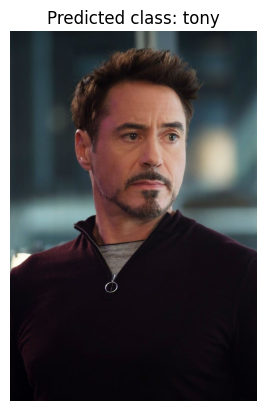

Predicted class: tony


In [52]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have already trained your model (knn, scaler, pca, label_map are defined)

def predict_and_display_image(image_path, knn, scaler, pca, label_map):
    """Predicts the class of a single image and displays it."""

    image_disp = Image.open(image_path)
    img = Image.open(image_path).resize((64, 64))
    img_array = np.array(img).reshape(1, -1)
    img_scaled = scaler.transform(img_array)
    img_pca = pca.transform(img_scaled)

    prediction_idx = knn.predict(img_pca)[0]
    prediction_label = list(label_map.keys())[list(label_map.values()).index(prediction_idx)]

    plt.imshow(image_disp)
    plt.title(f"Predicted class: {prediction_label}")
    plt.axis('off')
    plt.show()

    return prediction_label  # Return the predicted label

# Example usage with evaluation metrics
train_images, train_labels = load_images_from_directory('/content/drive/MyDrive/IMG/Train')
test_images, test_labels = load_images_from_directory('/content/drive/MyDrive/IMG/test2')

# ... (Rest of your code for preparing X_train, X_test, y_train, y_test, etc.)

# Assuming you have trained the knn model
# ...

# Predictions on the test set
y_pred = knn.predict(X_test_pca)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_map.keys())

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Example for single image prediction and display
image_path = '/content/drive/MyDrive/IMG/test2/tonyyyyyyyyyyy' # Example path
predicted_label = predict_and_display_image(image_path, knn, scaler, pca, label_map)
print(f"Predicted class: {predicted_label}")